In [ ]:
# # Install devtools if not already installed
# if (!requireNamespace("devtools", quietly = TRUE)) {
#     install.packages("devtools")
# }

# Install SeuratDisk using devtools
#devtools::install_github("mojaveazure/seurat-disk")

# Load the libraries
library(Seurat)

In [ ]:
convert_seurat_to_scanpy <- function(seurat_path, output_name) {
    library(Seurat)
    library(SeuratDisk)
    
    # Load the Seurat object
    seurat_obj <- readRDS(seurat_path)
    
    # Get current assay name
    current_assay <- DefaultAssay(seurat_obj)
    
    # Convert to h5Seurat with explicit parameters to preserve all data
    SaveH5Seurat(seurat_obj, 
                 filename = paste0(output_name, ".h5Seurat"),
                 assay = current_assay,    # Explicitly specify assay
                 verbose = TRUE,           # More informative output
                 overwrite = TRUE)         # Overwrite if exists
    
    # Convert h5Seurat to h5ad with explicit parameters
    Convert(paste0(output_name, ".h5Seurat"), 
           dest = "h5ad",
           assay = current_assay,     # Use same assay as above
           verbose = TRUE,            # More informative output
           overwrite = TRUE)          # Overwrite if exists
    
    # Clean up intermediate file
    file.remove(paste0(output_name, ".h5Seurat"))
    
    # Print information about the conversion
    cat("Conversion complete!\n")
    cat("Output file:", paste0(output_name, ".h5ad"), "\n")
    cat("Original assay used:", current_assay, "\n")
    cat("Number of features:", nrow(seurat_obj), "\n")
    cat("Number of cells:", ncol(seurat_obj), "\n")
    
    # Optional: Verify the conversion
    if(file.exists(paste0(output_name, ".h5ad"))) {
        cat("Verified: h5ad file was created successfully\n")
    } else {
        warning("h5ad file was not created!")
    }
}

# Usage example:
# convert_seurat_to_scanpy("path/to/seurat.rds", "output_name")

In [3]:
convert_seurat_to_scanpy("/data/norman/southark/external_datasets/fibroblast_atlas_2021/human_perturbed_state_atlas.RDS", "/data/norman/southark/external_datasets/fibroblast_atlas_2021/human_perturbed_state_atlas_v2")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding scale.data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for harmony

Adding loadings for harmony

Adding projected loadings for harmony

Adding standard deviations for harmony

No JackStraw data for harmony

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Validating h5Seurat file

Adding scale.data from RNA as X

Transfering meta.features to var

Adding data from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for harmony

Adding feature loadings for harmony

Adding dimensional reduction information for pca

Addi

Conversion complete! The h5ad file has been saved as: /data/norman/southark/external_datasets/fibroblast_atlas_2021/human_perturbed_state_atlas_v2.h5ad 


In [4]:
seurat_obj <- readRDS("/data/norman/southark/external_datasets/fibroblast_atlas_2021/human_perturbed_state_atlas.RDS")

In [5]:
seurat_obj

An object of class Seurat 
17410 features across 10355 samples within 1 assay 
Active assay: RNA (17410 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

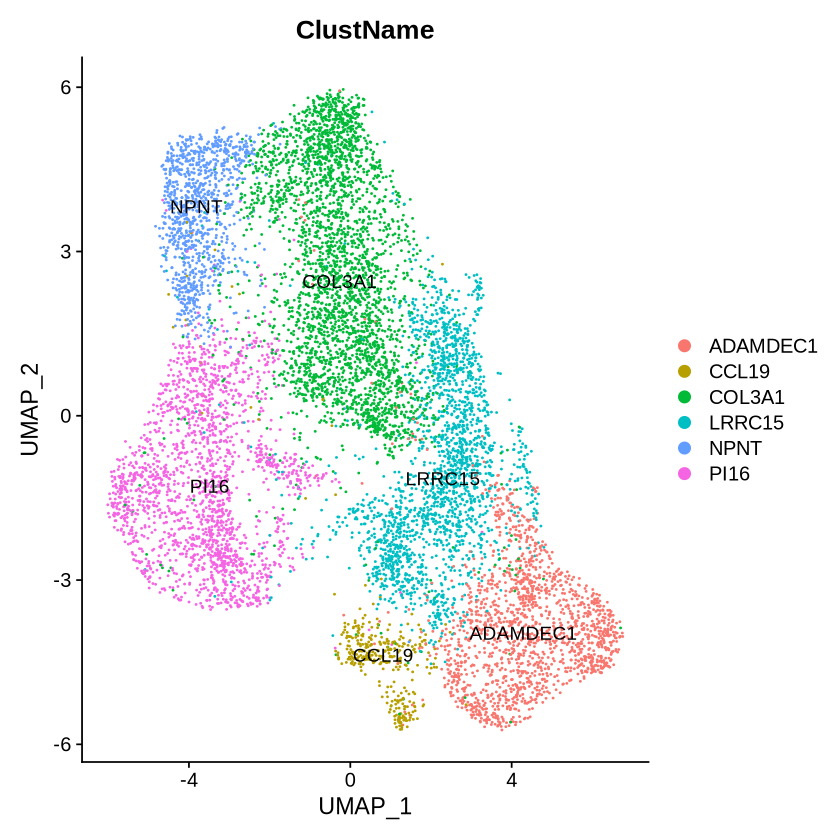

In [9]:
DimPlot(seurat_obj, reduction = "umap", group.by ='ClustName', label = TRUE)

In [8]:
head(seurat_obj@meta.data)

,nCount_RNA,nFeature_RNA,Cluster,ClustName,Tissue
,<dbl>,<int>,<fct>,<chr>,<chr>
S02_AAACCTGCAAGCTGTT-1,5920,2545,1,LRRC15,PDAC
S02_AAACCTGCATCTCCCA-1,4218,1592,1,LRRC15,PDAC
S02_AAACCTGGTTACCAGT-1,5226,2358,1,LRRC15,PDAC
S02_AAACGGGTCTTGACGA-1,5420,1715,1,LRRC15,PDAC
S02_AAAGATGAGGATATAC-1,4928,1883,1,LRRC15,PDAC
S02_AAAGATGCAATAGCGG-1,4512,2090,1,LRRC15,PDAC
